In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "copulagan"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.016042,-0.044642,0.162137,-0.055814,0.065584,0.016009,-0.034118,-0.076394,-0.011733,-0.084468,99.0
1,0.080257,0.050680,0.120411,0.049832,0.030450,0.103777,-0.102307,-0.031634,0.115762,-0.039541,219.0
2,0.060492,0.050680,0.130396,0.041827,0.024224,-0.039970,-0.047437,-0.038190,-0.101331,-0.013856,334.0
3,0.047017,0.050680,0.165853,-0.022708,0.032637,0.003859,-0.095683,-0.017962,-0.002761,-0.112430,63.0
4,0.022814,0.050680,0.170555,-0.112400,0.065215,0.087130,0.042596,-0.020173,-0.062519,-0.093191,85.0
5,0.013030,0.050680,-0.024904,-0.047648,-0.008167,-0.049203,0.128270,-0.021035,-0.020985,0.002168,220.0
6,-0.019942,-0.044642,0.170555,0.019993,-0.100430,0.156716,0.050341,0.022946,0.039868,-0.120335,220.0
7,0.064509,0.050680,0.164417,-0.070305,-0.022780,-0.115613,-0.063557,0.025265,-0.114875,0.114818,73.0
8,-0.027198,0.050680,0.096304,0.008147,-0.096165,0.198788,-0.025785,0.004886,-0.091431,0.033756,173.0
9,0.001747,0.050680,0.170555,0.067753,0.070804,-0.023235,-0.040241,-0.076395,0.070798,0.064531,98.0


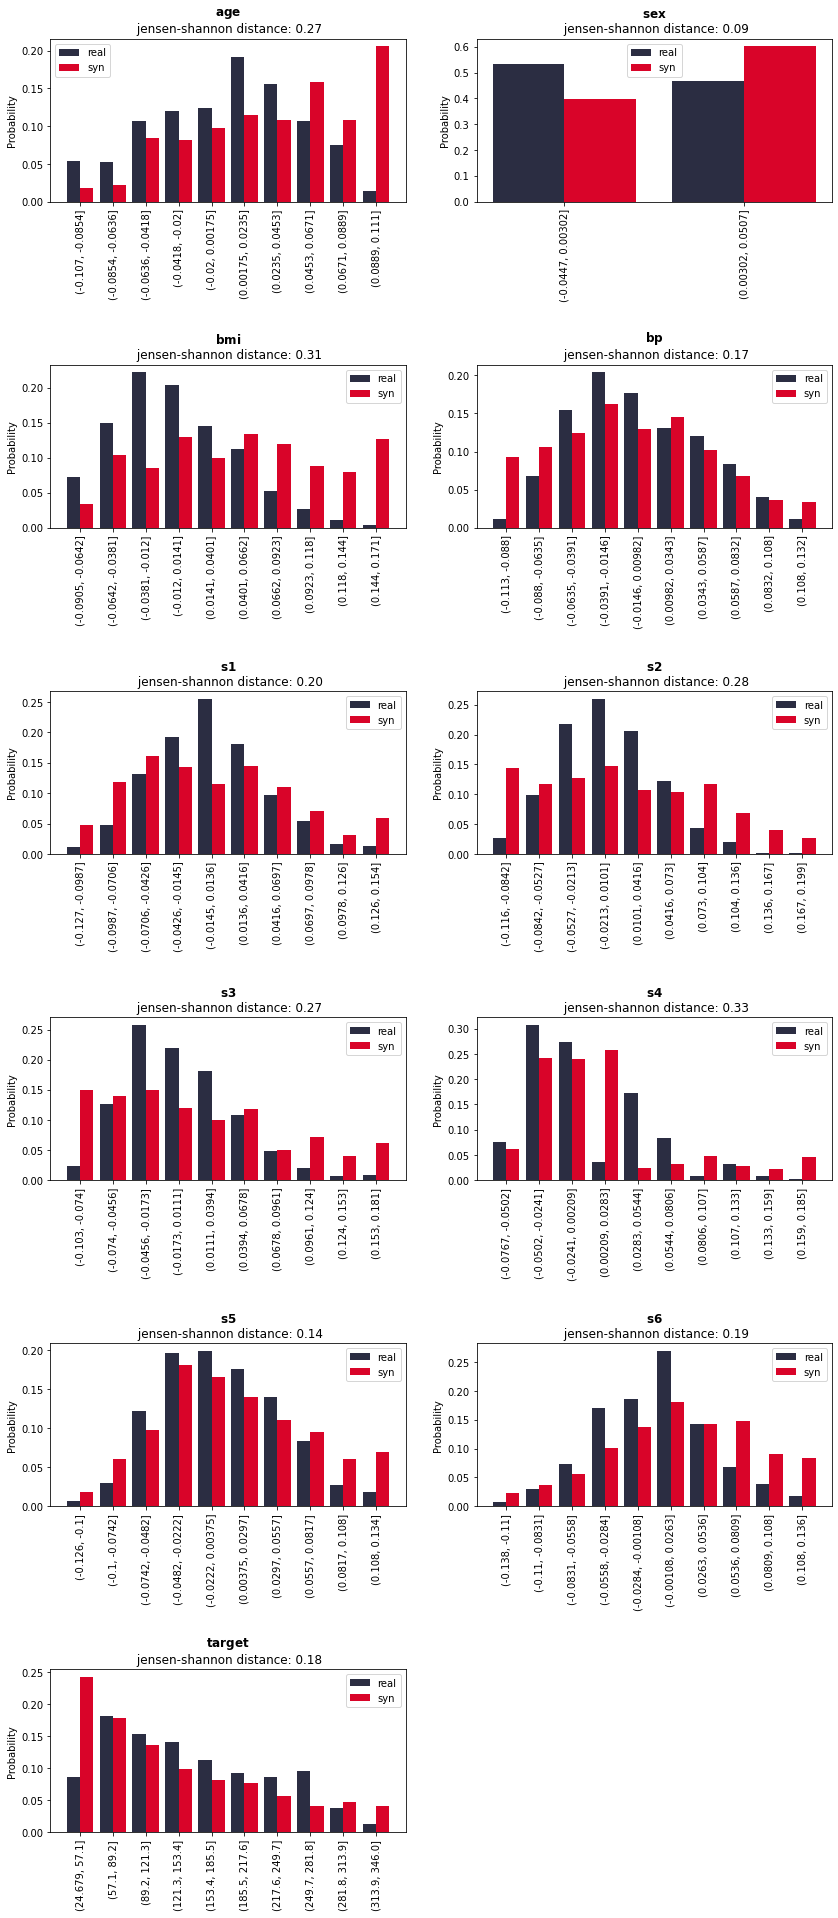

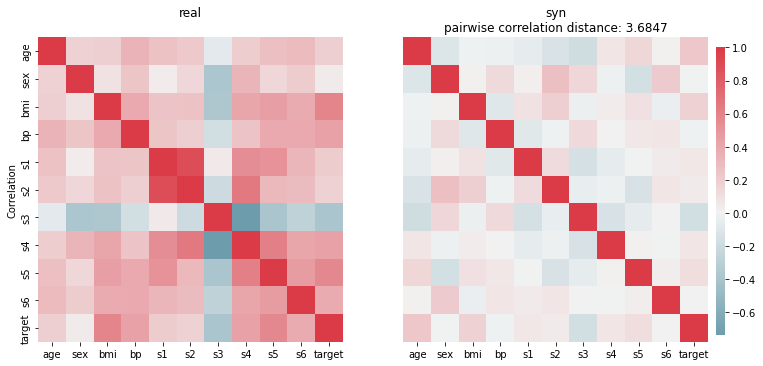

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : copulagan


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.00
sanity.common_rows_proportion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.01
sanity.nearest_syn_neighbor_distance,0.061577,0.114163,0.090689,0.021835,0.096326,0.026293,3,0,0.01
sanity.inlier_probability,0.712670,0.918552,0.792609,0.090126,0.746606,0.102941,3,0,0.01
sanity.outlier_probability,0.002262,0.011312,0.005279,0.004266,0.002262,0.004525,3,0,0.02
statistical.marginal.jensenshannon_distance,0.235548,0.264580,0.251941,0.012146,0.255694,0.014516,3,0,0.21
statistical.marginal.chi_squared_test,0.881570,0.959720,0.910663,0.034888,0.890701,0.039075,3,0,0.02
statistical.joint.feature_correlation,3.757385,3.830926,3.792770,0.030087,3.789999,0.036770,3,0,0.15
statistical.marginal.inverse_cdf_distance,0.131005,0.180466,0.155099,0.020212,0.153827,0.024731,3,0,4.48
statistical.marginal.inverse_kl_divergence,0.795655,0.828535,0.809648,0.013862,0.804753,0.016440,3,0,0.02
